In [40]:
import torch
from torch import optim
import matplotlib.pyplot as plt
from IPython.display import Image

In [39]:
Image(url='https://aria42.com/images/bfgs.png', width=400)

## basics

- references
    - https://aria42.com/blog/2014/12/understanding-lbfgs

- L-BFGS（Limited-memory Broyden–Fletcher–Goldfarb–Shanno）：属于拟牛顿方法的一种，使用一阶导数信息构建目标函数的二阶近似，即使用梯度信息来近似Hessian矩阵（二阶导数矩阵）。这使得L-BFGS在非凸问题上比SGD表现更好，特别是在优化平滑或近似二次的目标函数时。
- SGD：每次更新仅使用一个或少数几个样本计算的一阶导数（即梯度），而不构建目标函数的二阶近似。这意味着SGD可能需要更多的迭代次数来收敛，特别是在目标函数的形状复杂或非凸时。

## case：Rosenbrock function

In [35]:
# 2d Rosenbrock function
def f(x):
    return (1 - x[0]) ** 2 + 100 * (x[1] - x[0] ** 2) ** 2

$$
f(x,y)=(1-x)^2+100(y-x^2)^2
$$

In [32]:
# Gradient descent
x_gd = 10 * torch.ones(2, 1)
# x_gd = torch.zeros(2, 1)
x_gd.requires_grad = True
gd = optim.SGD([x_gd], lr=1e-5)
history_gd = []
for i in range(100):
    gd.zero_grad()
    objective = f(x_gd)
    objective.backward()
    gd.step()
    history_gd.append(objective.item())

In [27]:
x_gd

tensor([[1.9980e-03],
        [2.4998e-07]], requires_grad=True)

In [31]:
# L-BFGS
def closure():
    lbfgs.zero_grad()
    objective = f(x_lbfgs)
    objective.backward()
    return objective


x_lbfgs = 10 * torch.ones(2, 1)
# x_lbfgs = torch.zeros(2, 1)
x_lbfgs.requires_grad = True

lbfgs = optim.LBFGS([x_lbfgs],
                    history_size=10,
                    max_iter=4,
                    line_search_fn="strong_wolfe")

history_lbfgs = []
for i in range(100):
    history_lbfgs.append(f(x_lbfgs).item())
    lbfgs.step(closure)

In [29]:
x_lbfgs

tensor([[1.0000],
        [1.0000]], requires_grad=True)

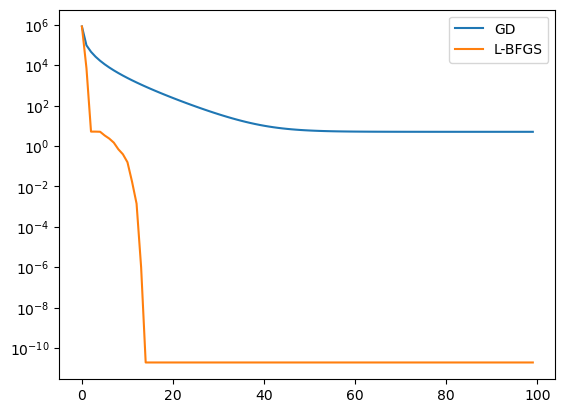

In [33]:
# Plotting
plt.semilogy(history_gd, label='GD')
plt.semilogy(history_lbfgs, label='L-BFGS')
plt.legend()
plt.show()